In [1]:
# !pip install tensorflow
#!pip install transformers
#!pip install tf-keras
# !pip install imblearn

In [2]:
import sys
from pathlib import Path

# Zum übergeordneten Ordner 'src' wechseln
current_path = Path().resolve()
src_path = current_path.parents[4]  # Zwei Stufen nach oben

if str(src_path) not in sys.path:
    sys.path.append(str(src_path))

src_path


WindowsPath('C:/Users/Nasiba/Documents/1 Master Data Science/Projektpraktikum/WebScience24')

In [7]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from collections import Counter
#nlp = spacy.load("en_core_web_sm")
from nltk import word_tokenize
pd.set_option('display.max_colwidth', None)
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from vector_functions import vectorize_glove, vectorize_glove_test_data,  vectorize_word2vec_test_data,  vectorize_glove_test_data_predict
import nltk
from tensorflow.keras.models import load_model

import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional, Embedding
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Recall, Precision
from tensorflow.keras.callbacks import EarlyStopping

from tensorflow.keras.callbacks import ReduceLROnPlateau

import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Embedding
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.metrics import Recall
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, matthews_corrcoef


#### Beladung der Daten

In [4]:

source_filepath_name = os.path.abspath(os.path.join(src_path, 'data/mixed_dataset/train_cleaned_rnn.csv'))

df_cleaned = pd.read_csv(source_filepath_name, encoding='utf-8', index_col=0)

source_filepath_name_test = os.path.abspath(os.path.join(src_path, 'data/mixed_dataset/test_cleaned_rnn.csv'))

df_cleaned_test = pd.read_csv(source_filepath_name_test, encoding='utf-8', index_col=0)


df_cleaned.head(1)


,label,tweet,tweet_cleaned,user_handle,hashtags,emojis
140232,0,"Nicki's ""that's not good"" pout bought to you by Botox[™]. #MKR","nickis ""thats not good"" pout bought to you by botox trade mark mkr",0,['#mkr'],__trade_mark__


### Vektorisierung

#### GloVe 

In [5]:


twitter_glove_path = os.path.abspath(os.path.join(src_path, 'src/3. Deep Learning Approach/nasiba/glove.6B.200d.txt'))


X_train_vectors, X_test_vectors, y_train, y_test, glove_embeddings,tokenizer = vectorize_glove(df=df_cleaned, text_column ="tweet_cleaned", label_column="label", glove_path=twitter_glove_path)

X_test_data_vectors , y_test_data, glove_embeddings_test,tokenizer_test = vectorize_glove_test_data(df=df_cleaned_test, text_column ="tweet_cleaned", label_column="label", glove_path=twitter_glove_path, tokenizer=tokenizer)


c:\Users\Nasiba\Documents\1 Master Data Science\Projektpraktikum\WebScience24\src\3. Deep Learning Approach\nasiba\Training\Phase_2\vector_functions.py:438: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[text_column] = df[text_column].astype(str)
c:\Users\Nasiba\Documents\1 Master Data Science\Projektpraktikum\WebScience24\src\3. Deep Learning Approach\nasiba\Training\Phase_2\vector_functions.py:510: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[text_column] = df[text_column].astype(str)


### Modell aufbauen 

#### Model 1:

In [6]:
samples, max_seq_len, vector_size = X_train_vectors.shape
num_classes = len(np.unique(y_train))


# y_train_onehot = to_categorical(y_train, num_classes=num_classes)
# y_test_onehot = to_categorical(y_test, num_classes=num_classes)
# y_test_onehot_data = to_categorical(y_test_data, num_classes=num_classes)

# Modellinitialisierung
model_3 = Sequential()

# LSTM-Schicht
model_3.add(LSTM(units=128, input_shape=(max_seq_len, vector_size), return_sequences=False))

# Optional: Dropout zur Vermeidung von Overfitting
model_3.add(Dropout(0.5))

# Dense-Schicht für die Ausgabe
model_3.add(Dense(units=1, activation='sigmoid'))

# Kompilieren des Modells
model_3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy', Recall()])

class_weight = {0: 1, 1: 3} 
history_3 = model_3.fit(
    X_train_vectors, np.array(y_train),
    validation_data=(X_test_vectors, np.array(y_test)),
    epochs=10,
    batch_size=32,
    class_weight=class_weight,
    verbose=2
)
# Vorhersagen auf Testdaten
predictions_3 = model_3.predict(X_test_data_vectors)
threshold = 0.35  # Oder teste 0.4 oder 0.6
predicted_classes_3 = (predictions_3 > threshold).astype(int)

C:\Users\Nasiba\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
2996/2996 - 105s - 35ms/step - accuracy: 0.6655 - loss: 0.8835 - recall: 0.9545 - val_accuracy: 0.3898 - val_loss: 1.0193 - val_recall: 0.9774
Epoch 2/10
2996/2996 - 126s - 42ms/step - accuracy: 0.7435 - loss: 0.7421 - recall: 0.9577 - val_accuracy: 0.6659 - val_loss: 0.6970 - val_recall: 0.8772
Epoch 3/10
2996/2996 - 160s - 54ms/step - accuracy: 0.7968 - loss: 0.6203 - recall: 0.9665 - val_accuracy: 0.6425 - val_loss: 0.8152 - val_recall: 0.8794
Epoch 4/10
2996/2996 - 134s - 45ms/step - accuracy: 0.8501 - loss: 0.4969 - recall: 0.9738 - val_accuracy: 0.6859 - val_loss: 0.7331 - val_recall: 0.8366
Epoch 5/10
2996/2996 - 129s - 43ms/step - accuracy: 0.8852 - loss: 0.4020 - recall: 0.9796 - val_accuracy: 0.7567 - val_loss: 0.6709 - val_recall: 0.7298
Epoch 6/10
2996/2996 - 131s - 44ms/step - accuracy: 0.9116 - loss: 0.3292 - recall: 0.9844 - val_accuracy: 0.7669 - val_loss: 0.7013 - val_recall: 0.6967
Epoch 7/10
2996/2996 - 134s - 45ms/step - accuracy: 0.9283 - loss: 0.2780 - 

 F1-Score (Klasse 2): 0.5425
 Recall (Klasse 2): 0.6400
 Precision (Klasse 2): 0.4708
 Accuracy (gesamt): 0.7729
 MCC: 0.4043
Confusion Matrix:
 [[20761  4924]
 [ 2464  4380]]


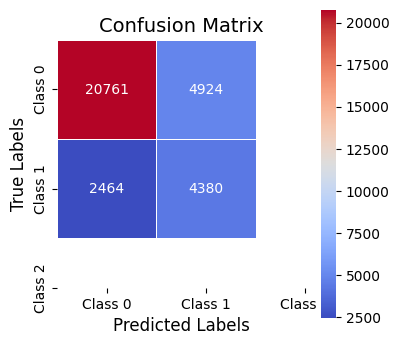

In [8]:
# Klassifikationsbericht erstellen (als Dictionary)
report = classification_report(y_test_data, predicted_classes_3, output_dict=True)

# Metriken NUR für Klasse 2 extrahieren
precision_class_2 = report["1"]["precision"]
recall_class_2 = report["1"]["recall"]
f1_class_2 = report["1"]["f1-score"]

# Gesamtgenauigkeit berechnen
accuracy = accuracy_score(y_test_data, predicted_classes_3)

# Matthews Correlation Coefficient (MCC)
mcc = matthews_corrcoef(y_test_data, predicted_classes_3)

# Ergebnisse ausgeben (nur für Klasse 2)
print(f" F1-Score (Klasse 2): {f1_class_2:.4f}")
print(f" Recall (Klasse 2): {recall_class_2:.4f}")
print(f" Precision (Klasse 2): {precision_class_2:.4f}")
print(f" Accuracy (gesamt): {accuracy:.4f}")
print(f" MCC: {mcc:.4f}")

# Confusion Matrix berechnen
cm = confusion_matrix(y_test_data, predicted_classes_3)
print("Confusion Matrix:\n", cm)

# Verwirrungsmatrix visualisieren
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm", linewidths=0.5, square=True,
            xticklabels=["Class 0", "Class 1", "Class 2"], yticklabels=["Class 0", "Class 1", "Class 2"])
plt.xlabel("Predicted Labels", fontsize=12)
plt.ylabel("True Labels", fontsize=12)
plt.title("Confusion Matrix", fontsize=14)
plt.show()

#### Model 2:
Earlystop Aktivierung + Dropout Erhöhung + epochen erhöhung + learning rate dynamisieren

In [9]:

samples, max_seq_len, vector_size = X_train_vectors.shape
num_classes = len(np.unique(y_train))
# Modellinitialisierung
model_17 = Sequential()

# LSTM-Schicht
model_17.add(LSTM(units=128, input_shape=(max_seq_len, vector_size), return_sequences=False))

# Optional: Dropout zur Vermeidung von Overfitting
model_17.add(Dropout(0.35))

# Dense-Schicht für die Ausgabe
model_17.add(Dense(units=1, activation='sigmoid'))

# Kompilieren des Modells mit verbesserter Lernrate
model_17.compile(optimizer=Adam(),
                 loss='binary_crossentropy',
                 metrics=['accuracy', Recall()])

class_weight = {0: 1, 1: 3}
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=0.00001)

history_17 = model_17.fit(
    X_train_vectors, np.array(y_train),
    validation_data=(X_test_vectors, np.array(y_test)),
    epochs=50,
    batch_size=32,
    callbacks=[early_stopping,reduce_lr],
    class_weight=class_weight,
    verbose=2
)


predictions_17 = model_17.predict(X_test_data_vectors)
threshold = 0.35  # Oder teste 0.4 oder 0.6
predicted_classes_17 = (predictions_17 > threshold).astype(int)


C:\Users\Nasiba\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
2996/2996 - 139s - 47ms/step - accuracy: 0.6679 - loss: 0.8802 - recall_1: 0.9477 - val_accuracy: 0.5421 - val_loss: 0.8222 - val_recall_1: 0.9408 - learning_rate: 0.0010
Epoch 2/50
2996/2996 - 169s - 56ms/step - accuracy: 0.7451 - loss: 0.7365 - recall_1: 0.9537 - val_accuracy: 0.6721 - val_loss: 0.6775 - val_recall_1: 0.8583 - learning_rate: 0.0010
Epoch 3/50
2996/2996 - 248s - 83ms/step - accuracy: 0.7959 - loss: 0.6241 - recall_1: 0.9652 - val_accuracy: 0.7398 - val_loss: 0.6075 - val_recall_1: 0.7941 - learning_rate: 0.0010
Epoch 4/50
2996/2996 - 311s - 104ms/step - accuracy: 0.8488 - loss: 0.5020 - recall_1: 0.9743 - val_accuracy: 0.7026 - val_loss: 0.7417 - val_recall_1: 0.8048 - learning_rate: 0.0010
Epoch 5/50
2996/2996 - 273s - 91ms/step - accuracy: 0.8650 - loss: 0.4625 - recall_1: 0.9722 - val_accuracy: 0.7059 - val_loss: 0.6756 - val_recall_1: 0.7914 - learning_rate: 0.0010
Epoch 6/50
2996/2996 - 238s - 79ms/step - accuracy: 0.8955 - loss: 0.3741 - recall_1: 0.9

 F1-Score (Klasse 2): 0.5416
 Recall (Klasse 2): 0.7507
 Precision (Klasse 2): 0.4236
 Accuracy (gesamt): 0.7327
 MCC: 0.4034
Confusion Matrix:
 [[18695  6990]
 [ 1706  5138]]


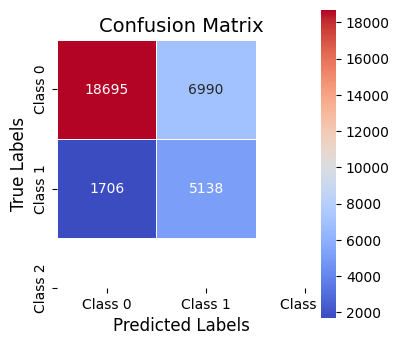

In [16]:
# Klassifikationsbericht erstellen (als Dictionary)
report = classification_report(y_test_data, predicted_classes_17, output_dict=True)

# Metriken NUR für Klasse 2 extrahieren
precision_class_2 = report["1"]["precision"]
recall_class_2 = report["1"]["recall"]
f1_class_2 = report["1"]["f1-score"]

# Gesamtgenauigkeit berechnen
accuracy = accuracy_score(y_test_data, predicted_classes_17)

# Matthews Correlation Coefficient (MCC)
mcc = matthews_corrcoef(y_test_data, predicted_classes_17)

# Ergebnisse ausgeben (nur für Klasse 2)
print(f" F1-Score (Klasse 2): {f1_class_2:.4f}")
print(f" Recall (Klasse 2): {recall_class_2:.4f}")
print(f" Precision (Klasse 2): {precision_class_2:.4f}")
print(f" Accuracy (gesamt): {accuracy:.4f}")
print(f" MCC: {mcc:.4f}")

# Confusion Matrix berechnen
cm = confusion_matrix(y_test_data, predicted_classes_17)
print("Confusion Matrix:\n", cm)

# Verwirrungsmatrix visualisieren
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm", linewidths=0.5, square=True,
            xticklabels=["Class 0", "Class 1", "Class 2"], yticklabels=["Class 0", "Class 1", "Class 2"])
plt.xlabel("Predicted Labels", fontsize=12)
plt.ylabel("True Labels", fontsize=12)
plt.title("Confusion Matrix", fontsize=14)
plt.show()

#### Model 3:
Earlystop Aktivierung + Dropout Standard gelassen + epochen erhöhung + learning rate dynamisieren

In [10]:

samples, max_seq_len, vector_size = X_train_vectors.shape
num_classes = len(np.unique(y_train))
# Modellinitialisierung
model_21 = Sequential()

# LSTM-Schicht
model_21.add(LSTM(units=128, input_shape=(max_seq_len, vector_size), return_sequences=False))

# Optional: Dropout zur Vermeidung von Overfitting
model_21.add(Dropout(0.5))

# Dense-Schicht für die Ausgabe
model_21.add(Dense(units=1, activation='sigmoid'))

# Kompilieren des Modells mit verbesserter Lernrate
model_21.compile(optimizer=Adam(),
                 loss='binary_crossentropy',
                 metrics=['accuracy', Recall()])

class_weight = {0: 1, 1: 3}
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=0.00001)

history_21 = model_21.fit(
    X_train_vectors, np.array(y_train),
    validation_data=(X_test_vectors, np.array(y_test)),
    epochs=50,
    batch_size=32,
    callbacks=[early_stopping,reduce_lr],
    class_weight=class_weight,
    verbose=2
)

# Vorhersagen auf Testdaten
predictions_21= model_21.predict(X_test_data_vectors)
threshold = 0.35  # Oder teste 0.4 oder 0.6
predicted_classes_21 = (predictions_21 > threshold).astype(int)




Epoch 1/50
2996/2996 - 252s - 84ms/step - accuracy: 0.6527 - loss: 0.9004 - recall_2: 0.9557 - val_accuracy: 0.5534 - val_loss: 0.8068 - val_recall_2: 0.9202 - learning_rate: 0.0010
Epoch 2/50
2996/2996 - 198s - 66ms/step - accuracy: 0.7447 - loss: 0.7464 - recall_2: 0.9556 - val_accuracy: 0.6257 - val_loss: 0.7923 - val_recall_2: 0.9031 - learning_rate: 0.0010
Epoch 3/50
2996/2996 - 294s - 98ms/step - accuracy: 0.7947 - loss: 0.6267 - recall_2: 0.9667 - val_accuracy: 0.7457 - val_loss: 0.5751 - val_recall_2: 0.7693 - learning_rate: 0.0010
Epoch 4/50
2996/2996 - 244s - 81ms/step - accuracy: 0.8425 - loss: 0.5243 - recall_2: 0.9721 - val_accuracy: 0.7286 - val_loss: 0.6206 - val_recall_2: 0.7809 - learning_rate: 0.0010
Epoch 5/50
2996/2996 - 298s - 99ms/step - accuracy: 0.8787 - loss: 0.4299 - recall_2: 0.9788 - val_accuracy: 0.7182 - val_loss: 0.7525 - val_recall_2: 0.7724 - learning_rate: 0.0010
Epoch 6/50
2996/2996 - 231s - 77ms/step - accuracy: 0.9064 - loss: 0.3532 - recall_2: 0.98

 F1-Score (Klasse 2): 0.5153
 Recall (Klasse 2): 0.8293
 Precision (Klasse 2): 0.3738
 Accuracy (gesamt): 0.6717
 MCC: 0.3751
Confusion Matrix:
 [[16175  9510]
 [ 1168  5676]]


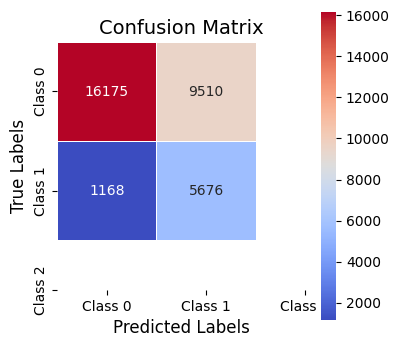

In [17]:
# Klassifikationsbericht erstellen (als Dictionary)
report = classification_report(y_test_data, predicted_classes_21, output_dict=True)

# Metriken NUR für Klasse 2 extrahieren
precision_class_2 = report["1"]["precision"]
recall_class_2 = report["1"]["recall"]
f1_class_2 = report["1"]["f1-score"]

# Gesamtgenauigkeit berechnen
accuracy = accuracy_score(y_test_data, predicted_classes_21)

# Matthews Correlation Coefficient (MCC)
mcc = matthews_corrcoef(y_test_data, predicted_classes_21)

# Ergebnisse ausgeben (nur für Klasse 2)
print(f" F1-Score (Klasse 2): {f1_class_2:.4f}")
print(f" Recall (Klasse 2): {recall_class_2:.4f}")
print(f" Precision (Klasse 2): {precision_class_2:.4f}")
print(f" Accuracy (gesamt): {accuracy:.4f}")
print(f" MCC: {mcc:.4f}")

# Confusion Matrix berechnen
cm = confusion_matrix(y_test_data, predicted_classes_21)
print("Confusion Matrix:\n", cm)

# Verwirrungsmatrix visualisieren
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm", linewidths=0.5, square=True,
            xticklabels=["Class 0", "Class 1", "Class 2"], yticklabels=["Class 0", "Class 1", "Class 2"])
plt.xlabel("Predicted Labels", fontsize=12)
plt.ylabel("True Labels", fontsize=12)
plt.title("Confusion Matrix", fontsize=14)
plt.show()

model_21 mit anderem tokenizer

In [11]:

samples, max_seq_len, vector_size = X_train_vectors.shape
num_classes = len(np.unique(y_train))
# Modellinitialisierung
model_21_tok = Sequential()

# LSTM-Schicht
model_21_tok.add(LSTM(units=128, input_shape=(max_seq_len, vector_size), return_sequences=False))

# Optional: Dropout zur Vermeidung von Overfitting
model_21_tok.add(Dropout(0.5))

# Dense-Schicht für die Ausgabe
model_21_tok.add(Dense(units=1, activation='sigmoid'))

# Kompilieren des Modells mit verbesserter Lernrate
model_21_tok.compile(optimizer=Adam(),
                 loss='binary_crossentropy',
                 metrics=['accuracy', Recall()])

class_weight = {0: 1, 1: 3}
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=0.00001)

history_21_tok = model_21_tok.fit(
    X_train_vectors, np.array(y_train),
    validation_data=(X_test_vectors, np.array(y_test)),
    epochs=50,
    batch_size=32,
    callbacks=[early_stopping,reduce_lr],
    class_weight=class_weight,
    verbose=2
)

# Vorhersagen auf Testdaten
predictions_21_tok= model_21_tok.predict(X_test_data_vectors)
threshold=0.35 # Oder teste 0.4 oder 0.6
predicted_classes_21_tok = (predictions_21_tok > threshold).astype(int)





Epoch 1/50
2996/2996 - 146s - 49ms/step - accuracy: 0.6651 - loss: 0.8860 - recall_3: 0.9520 - val_accuracy: 0.6010 - val_loss: 0.8019 - val_recall_3: 0.9046 - learning_rate: 0.0010
Epoch 2/50
2996/2996 - 137s - 46ms/step - accuracy: 0.7433 - loss: 0.7504 - recall_3: 0.9527 - val_accuracy: 0.5567 - val_loss: 0.8651 - val_recall_3: 0.9360 - learning_rate: 0.0010
Epoch 3/50
2996/2996 - 138s - 46ms/step - accuracy: 0.7929 - loss: 0.6282 - recall_3: 0.9681 - val_accuracy: 0.6724 - val_loss: 0.7250 - val_recall_3: 0.8647 - learning_rate: 0.0010
Epoch 4/50
2996/2996 - 317s - 106ms/step - accuracy: 0.8419 - loss: 0.5182 - recall_3: 0.9734 - val_accuracy: 0.7456 - val_loss: 0.5868 - val_recall_3: 0.7627 - learning_rate: 0.0010
Epoch 5/50
2996/2996 - 143s - 48ms/step - accuracy: 0.8799 - loss: 0.4253 - recall_3: 0.9774 - val_accuracy: 0.7592 - val_loss: 0.6711 - val_recall_3: 0.7221 - learning_rate: 0.0010
Epoch 6/50
2996/2996 - 131s - 44ms/step - accuracy: 0.9040 - loss: 0.3563 - recall_3: 0.9

 F1-Score (Klasse 2): 0.5149
 Recall (Klasse 2): 0.8212
 Precision (Klasse 2): 0.3751
 Accuracy (gesamt): 0.6745
 MCC: 0.3751
Confusion Matrix:
 [[16321  9364]
 [ 1224  5620]]


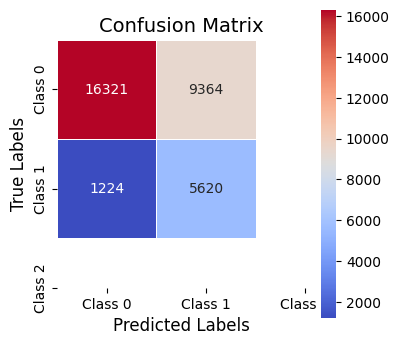

In [12]:
# Klassifikationsbericht erstellen (als Dictionary)
report = classification_report(y_test_data, predicted_classes_21_tok, output_dict=True)

# Metriken NUR für Klasse 2 extrahieren
precision_class_2 = report["1"]["precision"]
recall_class_2 = report["1"]["recall"]
f1_class_2 = report["1"]["f1-score"]

# Gesamtgenauigkeit berechnen
accuracy = accuracy_score(y_test_data, predicted_classes_21_tok)

# Matthews Correlation Coefficient (MCC)
mcc = matthews_corrcoef(y_test_data, predicted_classes_21)

# Ergebnisse ausgeben (nur für Klasse 2)
print(f" F1-Score (Klasse 2): {f1_class_2:.4f}")
print(f" Recall (Klasse 2): {recall_class_2:.4f}")
print(f" Precision (Klasse 2): {precision_class_2:.4f}")
print(f" Accuracy (gesamt): {accuracy:.4f}")
print(f" MCC: {mcc:.4f}")

# Confusion Matrix berechnen
cm = confusion_matrix(y_test_data, predicted_classes_21_tok)
print("Confusion Matrix:\n", cm)

# Verwirrungsmatrix visualisieren
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm", linewidths=0.5, square=True,
            xticklabels=["Class 0", "Class 1", "Class 2"], yticklabels=["Class 0", "Class 1", "Class 2"])
plt.xlabel("Predicted Labels", fontsize=12)
plt.ylabel("True Labels", fontsize=12)
plt.title("Confusion Matrix", fontsize=14)
plt.show()

In [ ]:
# Entferne NaN-Werte aus df_test
df_test = df_cleaned_test.dropna(subset=['tweet_cleaned', 'label'])

# Nutze den bereits trainierten Tokenizer für df_test
X_test_new = df_test['tweet_cleaned']

# Tokenisierung mit dem vorhandenen Tokenizer
X_test_new_sequences = tokenizer.texts_to_sequences(X_test_new)

# Padding auf gleiche Länge
X_test_padded_test = pad_sequences(X_test_new_sequences, padding='post', maxlen=max_seq_len)

Model_21 predicten Testdaten

In [9]:

source_filepath_name = os.path.abspath(os.path.join(src_path, 'data/mixed_dataset/test.csv'))

df_test = pd.read_csv(source_filepath_name, encoding='utf-8', index_col=0)

X_test_data_vectors_3, text_col_test_data, glove_embeddings_3_test, tokenizer_3_test = vectorize_glove_test_data_predict(df=df_test, text_column ="tweet", glove_path=twitter_glove_path, tokenizer=tokenizer)

text_col_test_data

8886                                                                                                                                                   @user #cinemaaawards final rehearsals!! gearing up for the evening!! #butterflies #stage  ! hope u all like it 
27613                                                                                                                                                                         this was amazing. the weather was not. #musical #london #matilda #westend #weekend  â¦ 
18952                                                                                                                                                                                         child attacked by alligator at walt disney world     #waltdisneyworld   
12485                                                                                                                                                                                                              

In [12]:
predictions_17_test= model_17.predict(X_test_data_vectors_3)
threshold=0.35 # Oder teste 0.4 oder 0.6
predicted_classes_17_test = (predictions_17_test > threshold).astype(int)
df_predictions_17 = df_test[['tweet']].copy()  # Textspalte übernehmen
df_predictions_17['predicted_label'] =predicted_classes_17_test  # Vorhersagen hinzufügen

df_positive_predictions_17 = df_predictions_17[df_predictions_17['predicted_label'] == 1][['tweet', 'predicted_label']]

df_positive_predictions_17

1019/1019 ━━━━━━━━━━━━━━━━━━━━ 19s 19ms/step


,tweet,predicted_label
11885,nothing would be more dangerous than to give #putinschoice the impression we accept #stopracism #boycott?â¦,1
27378,attacks 11 week old baby. kills mother. #shocking #disgusted,1
6640,and #misogyny is alive and well on the #left. never let them tell you it isn't.,1
19019,what is a #detoxdiet? #altwaystoheal! #healthy !,1
12084,politics is great in theory but politicians are all self obsessed point scoring children &amp; idiots take their word as gospel = dangerous,1
...,...,...
176344,@user Certainly the paper shows that the idea that drinking water was the only or main health issue in Iraq is a lie.,1
176360,Even liberals are humiliated by Charlie Rangel&#8217;s claim the GOP backs slavery - Hot Air http://t.co/I4QawESnud,1
176366,@user photoshop my nig,1
176384,And mad hoes you can ask Beavis I get nothing butthead,1


In [ ]:
predictions_21_test= model_21.predict(X_test_data_vectors_3)
threshold=0.35 # Oder teste 0.4 oder 0.6
predicted_classes_21_test = (predictions_21_test > threshold).astype(int)
df_predictions = df_test[['tweet']].copy()  # Textspalte übernehmen
df_predictions['predicted_label'] = predicted_classes_21_test  # Vorhersagen hinzufügen

# pd.set_option('display.max_rows', None)  # Keine Begrenzung der Zeilenanzahl
#pd.set_option('display.max_columns', None)  # Falls auch alle Spalten angezeigt werden sollen
df_positive_predictions = df_predictions[df_predictions['predicted_label'] == 1][['tweet', 'predicted_label']]

df_positive_predictions

Model_21 auf testdaten predicten

Modell speichern

In [13]:
save_path_model = os.path.abspath(os.path.join(src_path, 'src/3. Deep Learning Approach/nasiba/models/model_17.keras'))
# Erstelle das Verzeichnis, falls es nicht existiert
os.makedirs(os.path.dirname(save_path_model), exist_ok=True)
#save_path_model = os.path.abspath(os.path.join(src_path, 'src/3. Deep Learning Approach/nasiba/model_17.h5')) 
model_17.save(save_path_model)
print(f"Modell wurde erfolgreich gespeichert unter: {save_path_model}")

Modell wurde erfolgreich gespeichert unter: C:\Users\Nasiba\Documents\1 Master Data Science\Projektpraktikum\WebScience24\src\3. Deep Learning Approach\nasiba\models\model_17.keras


In [14]:


save_path_model = os.path.abspath(os.path.join(src_path, 'src/3. Deep Learning Approach/nasiba/models/model_3.keras'))
# Erstelle das Verzeichnis, falls es nicht existiert
os.makedirs(os.path.dirname(save_path_model), exist_ok=True)
#save_path_model = os.path.abspath(os.path.join(src_path, 'src/3. Deep Learning Approach/nasiba/model_17.h5')) 
model_3.save(save_path_model)
print(f"Modell wurde erfolgreich gespeichert unter: {save_path_model}")

Modell wurde erfolgreich gespeichert unter: C:\Users\Nasiba\Documents\1 Master Data Science\Projektpraktikum\WebScience24\src\3. Deep Learning Approach\nasiba\models\model_3.keras


In [15]:



save_path_model = os.path.abspath(os.path.join(src_path, 'src/3. Deep Learning Approach/nasiba/models/model_21.keras'))
# Erstelle das Verzeichnis, falls es nicht existiert
os.makedirs(os.path.dirname(save_path_model), exist_ok=True)

model_21.save(save_path_model)
print(f"Modell wurde erfolgreich gespeichert unter: {save_path_model}")

Modell wurde erfolgreich gespeichert unter: C:\Users\Nasiba\Documents\1 Master Data Science\Projektpraktikum\WebScience24\src\3. Deep Learning Approach\nasiba\models\model_21.keras


In [22]:
save_path_labeled_data_17 = os.path.abspath(os.path.join(src_path, 'src/3. Deep Learning Approach/nasiba/labeled_data/test_labeled_lstm_md_17.csv'))

save_path_labeled_data_21 = os.path.abspath(os.path.join(src_path, 'src/3. Deep Learning Approach/nasiba/labeled_data/test_labeled_lstm_md_21.csv'))


df_predictions_17.to_csv(save_path_labeled_data_17, index=False)
df_predictions.to_csv(save_path_labeled_data_21, index=False)